Hej gruppen!

I början antecknade jag för hand och inte speciellt organiserat. Det märks lite när det gäller frånvaron av hållpunkter (vilken sektion av videon jag hämtat informationen ifrån), men jag tror inte det gör så stor skillnad från er såtillvida ni inte vill kolla upp något i videon. Det är inte renskrivet på något sätt, men ambitionen har varit att skriva så att vi kan använda den som en lathund när vi väl sätter igång. 

Det är många upprepningar av kod för att det lättare skulle gå att få en överblick om vi skulle hoppa in någonstans mitt i. I slutet tröttnade jag dock vid något tillfälle och då har jag bara skrivit in referenser (den första biten kod) till de celler som ska användas.

Avnittet Understandning the Drawbacks of Using Deep Neural Networks with Images hoppade jag över helt och hållet.

Vill ni kolla på videon heter den Image Classification with PyTorch.

Color images has 3 channels (R, G, B) and gray scale images 1 (pixel intensity). The number of channels specifies the number of elements in the 3rd dimension (the first two are height and width but this can vary).
Grayscale (3,3,1)
Color (3,3,3)

Deep learning frameworks usually deal with a list of images in one 4d tensor (10,3,3,3) where the first dimension is the batch dimension. 

### Image Pre-processing Methods
#### Common techniques to improve CNN performance
    1. Uniform Aspect Ratio
    2. Uniform Image Size
    3. Mean and Perturbed Images
    4. Normalized Image Inputs
    5. Dimensionality Reduction
    6. Data Augmentation

#### Uniform Aspect Ratio
The ratio of the width of your image to the height of the image. Scale all 
images to have the same ration.
Crop images to square shape. Do a center crop to extract the most important part.

#### Uniform Image Size
All images have to be of the same size. Down-scaling and up-scaling.

#### Mean and Perturbed Images
##### Mean image:
Calculate average pixel value across the entire training data set. Eg. faces is usually centered.
Mean image technique will help yout CNN detect patterns.
##### Perturbed image:
Intentionally distort pixels by varying them from the mean image.
Perturbed image technique can make your CNN more robust by preventing it from focusing only on the center of the image.

#### Normalized Image Inputs
Center your pixel values around 0 mean. You normalize eache pixel by subtracting the mean pixel value across all of your training data or single batch, and dividing by the standard deviation. This ensures that each pixel has a similar data distribution. After normalization you might choose to rescale your pixel values to be in th 0-1 range.

#### Deimensionality Reduction
RGB => grayscale reduces 3 channels to 1. Training completes faster and helps extract the latent of significant features from your underlying data so thar your neural network does not have to deal with irrelevant features.

#### Data Augmentation
Perturbed images are a form of data augmentation. Others are:
- scaling,
- rotating or
- perform affine transforms of the input image.
Reduces the risk of overfitting your CNN on your training data.

In [3]:
import matplotlib.image as mpimg

mpimg.imread(img)  # Läsa in bilden

# Reshape
reshape(img.shape[0],-1)  # Samma höjd, men ändrat bredd och kanalvärde

# Resize
skimage.transform.resize(img, (500,500))  # Ändrar även proportioner

# Ratio
aspect_ratio_original = img_original.shape[1]/float(img_original.shape[0])
aspect_ratio_resized = img_resized.shape[1]/float(img_resized.shape[0])

# Rescale
rescaled = skimage.transform.rescale(resized, (1.0, aspect_ratio_original))

# RGB => BGR
change_channel_order = img[:, :, (2,1,0)]

# Gray
to_gray = skimage.color.rgb2gray(img)

# As float
as_float = skimage.img_as_float(skimage.io.imread(img)).astype(np.float32)

# Crop
def crop(image, cropx, cropy):  # (img,) width and height, eg. 256, 256
    y, x, c = image.shape
    startx = x // 2 - (cropx // 8)  # Vertictal line halfway? 
    starty = y // 3 - (cropy // 4)  # Horizontal line on third from top? 
    stopx = startx + cropx
    stopy = starty + 2 * cropy
    return image[starty:stopy, startx:stopx]

# Show picture
plt.figure(figsize=(6,6))
plt.title('Something')
plt.imshow(img_name)

# Make noise in image
from skimage.util import random_noise
sigma = 0.155
noisy = random_noise(img, var=sigma**2)

# Remove noise from image
from skimage import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

#sigma_est shows the noise value
sigma_est = estimate_sigma(img, multichannel=True, average_sigmas=True)

# Total variation filter
plt.imshow(denoise_tv_chambolle(img, weight=0.1, multichannel=True))

# Bilateral filter
plt.imshow(denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15, multichannel=True))

# Wavelet filter
plt.imshow(denoise_wavelet(img, multichannel=True))

# Flip your images randomly to build a more robust model
flipped = np.fliplr(img)  # l = left, r = right

TypeError: imread() missing 1 required positional argument: 'fname'

In [ ]:
# Standardizing Images in Pytorch
import pickle, numpy as np, matplotlib as plt

# The dataset consists of 10 000 pictures with the size of (32,32,3)
X.shape  #(10000,3072) 3072 = 32*32*3

# Reshape
X.reshape((-1,3,32,32))  # -1 selects all images(?)

# Different ML frameworks expects images to be in different format. Reshape if needed!

# Transpose
X = X.transpose(0,2,3,1)  # (10000,32,32,3)

# Back to original
X = X.reshpe(-1,3*32*32)

# Center data
X = X - X.means(axis=0)  # Subtract the mean value of all pixels ...
X = X(np.std(X,axis=0))  # ... and divide by the standard deviation
# The resulting images are all centered around 0 and expressed in terms z scores
# (standardavvikelser). Helps the performance of the ML models.

def show(i):
    i = i.reshape((32,32,3))
    m, M = i.min(), i.max()  # Min and max value of pixel intensities
    plt.imshow((i - m) / (M - m))  # Scales all pixels to be within 0 and 1
    plt.show()
show(X[6])



#### Whitening
Whitening can be used to decorrelate features in our input images. It is the 
transformation of data in such a way that its covariance matrix is the
identity matrix (enhetsmatris).

#### Variance vs covariance
Wikipedia: Variance refers to the spread of a data set around its mean value,
while a covariance refers to the measure of the directional relationship
between two random variables.

Wikipedia: Om de större värdena hos en variabel i huvudsak korrelerar med de
större värden hos den andra variabeln och motsvarande gäller för de mindre
värdena (att de uppvisar liknande beteende) är kovariansen positiv.
Om de större värdena hos den ena variabeln korrelerar med de mindre hos den
andra är kovariansen negativ. Kovariansens tecken visar således tendensen
i den linjära relationen mellan variablerna.

In [ ]:
# Calculate covarince
cov = np.cov(dataset, rowvar=True)

# Extract the latent factors in our covariance matrix with Single Value Decomposition
U, S, V = np.linalg.svd(cov)

# ZCA whitening, the principal components, the sginificant feature
epsilon = 1e-5
zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

# Multiply the principal components by the original matrix is whitening
zca = np.dot(zca_matrix, dataset)

# Learn more about why whitening is useful.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# PyTorch have a bunch of helper classes to transform the images.
dir(transforms)

transform = transforms.Compose([transforms.Resize(256), transforms.ToTensor()])

# CIFAR10 is a built-in dataset, this code downloads the dataset and transforms the images
dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train',
                                      download=True, transform=transform)

# Once you hava a dataset in PyTorch, you can load in the data in this dataset
# in batches using a DataLoader.
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

# Use Python iter function to load in the first batch of images and correspondent labels
images_batch, labels_batch = iter(dataloader).next()

# Look at the images in the batch
img = torchvision.utils.make_grid(images_batch)

img.shape
# If out is torch.Size([3, something, something]), transpose it so that the channels is last
img = np.transpose(img, (1,2,0))

In [ ]:
# We can´t always load all images in a batch at once, but we still have to know the mean and std
pop_mean = []
pop_std = []

for i, data in enumerate(dataloader, 0):
    numpy_image = data[0].numpy()
    
    batch_mean = np.mean(numpy_image, axis=(0, 2, 3))  # 0 = batch, 2 = height, 3 = width
    batch_std = np.std(numpy_image, axis=(0, 2, 3))
    
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

# Make the lists arrays    
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

# Approximate the mean and standard deviation averages
pop_mean = pop_mean.mean(axis=0)
pop_std = pop_std.mean(axis=0)

# Print the result
print(pop_mean)
print(pop_std)

# Output is
# [0.491.., 0.482.., 0.4467..]
# [0.238.., 0.234.., 0.2526..]

# Examples of somre transforms that we can apply on the input images before we feed them in.
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor,
    transforms.Normalize(pop_mean, pop_std)  # Normalize is to subtracting the mean and dividing
                                             # the images by the standard deviation, often "standardization"
                                             # outside PyTorch but then it´s slightly different. 
])

# Load the dataset with the specified transforms once again
trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', train=True,
                                      download=True, transform=transform)

# Create a new DataLoader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

# Look at one batch
images_batch, labels_batch = iter(trainloader).next()
images_batch.shape

img = torchvision.utils.make_grid(images_batch)
img.shape

img = np.transpose(img, (1, 2, 0))  # Set the channels in the 3rd dimension if not already there

# Scale all pixel value between 0 and 1
m, M = img.min(), img.max()  # Check the values
img = (1/(abs(m) * M)) * img + 0.5  # The values will be centered around 0.5

### Introducing Convolutional Neural Networks
Every neuron in our eye is stimulated using a local receptive field. CNNs are also designed to have a local receptive field and are used to extract features from input images. Pooling layers in a CNN apply an aggregation function to the input.

#### Neural Networks
The idea that lower-level neurons pick up granular information which are then put together to understand more complex patterns by higher-level neurons.

#### Two Kinds of Layers in CNNs:
1. Convolution, local receptive field, reacts only on those pixels that lie within the local receptive field.
2. Pooling, responsible for subsampling the input, sampling the input to extract higher level abstractions and make the data more tractable to work with.

#### Convolution
Allows neurons to focus on a lical receptive field and react to visual stimuli in that field. In this contect, convolutional refers to a mathematical function which basically is a sliding window function that is applied to a matrix. The matrix refers to the input image, a matrix of pixels. The sliding window function is applied to this input image to extract features and is often called a kernel or a filter. It is associated with wieghts and these weight are what help this kernel extract specific kinds of features, detect edges, corners, lines. The function slides over every pixel in the input image. The kernel is applies in an element-wise sliding-window fashion.

The matrix (e.g. 6x6) in combination with a kernel (e.g. 3x3) results in a convolution result that is smaller (4x4) than our input image. This is because of the size of the kernel that we´ve chosen. The kernel cannot slide off the edges of the input matrix unless we specify padding.

(Is the kernel always built of one 0, one 1, one 0 a.s.o.?)

The value of the pixel in the matrix is multiplied by the value of the cell in the kernel that is layered over the matrix, i.e. 1 or 0. The sum of all sums is the value in the first cell of our convolution result table. This convolution kernel is applied to every channel of the input image separately, so if you have a multi-channel image the convolution kernel will slide over the matrix for each channel. 

#### Convolutional Layers
- Convolutional layers zoom in on specific bits of input. 
- Extract structure and features in the input image (with help of the kernel).
- Successive layers aggregate inputs into higher level features. Earlier layers are focusiing on extracting the individual pieces like them in a jigsaw puzzle, later layers put them together. They aggregate and put into higher level features. Pixels >> Lines >> Edges >> Object

When you apply a convolution kernel to a pixel matrix, the result of the convolution layer is a feature map/convolution result.

#### Kernel Size
- Convolutional kernel size usually expressed in terms of width and height of receptive area.
- It´s more efficient to use small convolutional kernels.
- Stacking two 3x3 kernels is prefereable to one 9x9 kernel.

#### Feature Maps
A stride is basically the distance between successive receptive fields (the movement of the kernel), a horizontal and a vertical.

If we want our feature map to be the same size as our input matrix, we might need 0 padding at the edges. 

CNNs are sparsely connected neural networks, not densely. Neurons are not connected to all pixels.

All neurons in a feature map have the same weight and biases. 

Two big advantages over DNNs:
1. Dramatically fewer parameters to train.
2. CNN can recognize feature patterns independent of location. This adds location invariance to our convolutional layer.

#### CNNs
A convolutional layer can be thought of as a stack of feature maps (same size) which extract different features from the input image which gives it a depth. A CNN is made up of many convolutional layers. Different feature maps have different parameters and extract different features from the input. 

#### Pooling Layers
The input to a pooling layer is essentially a matrix of pixels that is our image. The pooling layer applies a kind of aggregation operation to the input. This aggregation can be the max aggregation (a 2x2 filter (stride = 2 (horizontal and vertical)) for a 4x4 matrix). An alternative is average pooling where pooling layer calculates the average of the input pixels. 

The pooling filter does not stride pixel by pixel but instead moves one length at some direction. A maximum layer take the max value from the matrix part hovered by the pooling layer and puts it in the pooling result table. 

Neurons in a pooling layer have no weights or biases.

A pooling neuron simply applies some aggregation function to all inputs. Max, sum or average. 

Why we use them?
- Greatly reduce memory usage during training
- Mitigate overfitting (via subsampling)
- Make NN recognize features independent of location (location invariance)

Pooling layers typically act on each channel independently.

Usually, output are < input area, but the output depth = input depth.

#### CNN Architectures
The input will be a batch or list of images which will be passed through convolutional layers, followed by pooling layers followed by other convolutional layers. The order can change between different architectures as well as the number of layers respectively.

Each group of convolutional layers is usually followed by a ReLU activation layer. Between the convolutional layers and the ReLU layers you often do a batch nomalization (shifting and scaling the output of your convolutional layer around 0).

The output of every layer of the CNN is an image. As the image passes through the layers, the successive outputs are smaller and smaller (thanks to the pooling layers) as well as deeper and deeper (due to feature maps in the convolutional layers). The small but deep output is then fed into a regular, feed-forward neural network. 

This feed-forward neural network is essentially a fully connected neural network which has a few fully connected layers with the ReLU activation. The feed-forward layer will emit output probabilities for different categories and this is typically the softmax or the log softmax layer. 

The input to a CNN is an image and the output of a CNN are probabilities. These will be the probabilites corresponding to the different categories in our image classification problem. 

#### Understand Convolution

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
img = Image.open('file/path').convert('RGB')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as tf

In [ ]:
transforms = tf.Compose([tf.Resize(400), tf.ToTensor()])  # Resize preserves the original ratio, input in pixels

In [ ]:
img_tensor = transforms(img)

In [ ]:
img_tensor.shape
# Output is torch.Size([3, 400, 599])

In [ ]:
# A 4d matrix (four [])
sharpen_kernel = [[
    [[0, -1, 0]],
    [[-1, 5, -1]],
    [[0, -1, 0]]]]

In [ ]:
horizontal_line_kernel = [[
    [[1, 0, -1]],
    [[0, 0, 0]],
    [[-1, 0, 1]]]]

In [ ]:
vertical_line_kernel = [[
    [[0, 1, 0]],
    [[1, -4, 1]],
    [[0, 1, 0]]]]

In [ ]:
edge_detection_kernel = [[
    [[-1, -1, -1]],
    [[-1, 8, -1]],
    [[-1, -1, -1]]]]

In [ ]:
# Convert the convolutional kernel matrix to a torch.Tensor
conv_filter = torch.Tensor(sharpen_kernel)

In [ ]:
conv_filter.shape
# Output is torch.Size([1, 3, 1, 3]) A [] with 1 [[[]]] consisting of
# 3 [[]] consisting of 1 [] consisting of 3 values?
# 1 = batch, 3 = RGB, 1 = height of the kernel, 3 = width of the kernel

In [ ]:
# Add an additional batch dimension of 1 at axis 0.
img_tensor = img_tensor.unsqueeze(0)

In [ ]:
img_tensor.shape
# Output is torch.Size([1, 3, 400, 599])

In [ ]:
# Apply the sharpen_kernel to our input image
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)

In [ ]:
conv_tensor.shape
# Output is torch.Size([1, 1, 400, 597])  # 597: The 3x3 kernel can´t slide over the last to pixels.

In [ ]:
# Get rid of the batch layer in the convolution result for an 3d image
conv_img = conv_tensor[0, :, :, :]
conv_img.shape
# Output is torch.Size([1, 400, 597])  # Channel, width, height

In [ ]:
# Squeeze out the single dimension at the beginning
conv_img = conv_img.numpy().squeeze()
conv.img.shape
# Output is ([400, 597]) and can be viewed using matplotlib

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(conv_img)

#### Understand Pooling

In [ ]:
pool = nn.MaxPool2d(2,2)

In [ ]:
pool_tensor = pool(conv_tensor)

In [ ]:
pool_tensor.shape
# Output is torch.Size([1, 1, 200, 298])
# The default stride of a pooling layer is typically the size of the pooling kernel.
# The output is therefore halfed (compare [400,597] with [200,298])

In [ ]:
pool_img = pool_tensor[0, :, :, :]
pool_img.shape
# Output is torch.Size([1, 200, 298])

In [ ]:
pool_img = pool_img.numpy().squeeze()
pool_img.shape
# Output is (200, 298)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(pool_img)

### Building Convolutional Neural Networks for Image Recognition

#### Zero-padding, Stride Size 
##### Narrow vs. Wide Convolution
Narrow convolution: Little zero padding; output (feature map/convolution result) narrower than input (image). Default if not specifying zero padding.
Wide convolution: Lots of zero padding, output wider than input.

With zero padding, every element of the matrix will be passed into filter. You might want to use zero-padding if you have important features located at the edges of your input images. We choose the number of zero columns to pad with. 

##### Stride Size
We can also choose how many columns and rows our kernel should move between each step. A horizontal stride of 1 makes the kernel move one step to the right and a vertical stride of two it moves two steps down. Stride size is an important hyperparameter in CNNs, default value in each direction is 1.

#### Batch Normalization
When building CNNs you'll often apply batch normalization to the output of your convolutional layers before passing them into the activation function. It mitigates the problem of vanishing and exploding gradients during training.

##### Training via Back Propagation
Image => Pixels => Edges => Corners => Object Parts => ML-based Classifier

The training of a neural network happens via back propagation; the backward pass through our neural network. The forward pass uses the current model's parameters to give you predicted values. You can 1) then compare them with actual values and calculate the error (Classifier). You 2) then use an optimizer which calculates gradients with respect to this error or loss (Object Parts), and 3) then uses these gradients to make backward pass through your neural network (Corners) to 4) update the model parameters (Edges). This is training your model via back propagation.

Back propagation fails if:
- gradients are vanishing, or
- gradients are exploding.

##### Vanishing Gradient Problem
Gradient descent optimization that we used to train our neural network model involves descending down in this gradient slope to find those model parameters that give us the lowest value of loss. It is possible that while trining your model you'll find that even when you tweak your model parameters, the gradient becomes 0 and stops changing. This don't allow our model to converge and is the vanishing gradient problem.

##### Exploding Gradient Problem
With this problem the gradient explodes och changes abruptly. This means that instead of descending down the gradient slope to find the smallest value of loss, you're kind of moving up and down with this slope and your model does not converge. 

##### Coping with Vanishing/Exploding Gradients
Neural networks that are very, very deep are especially prone to this problem of vanishing and exploding gradients. 
It can be mitigated with:
- Proper initialization of your model parameters (Xavier and He initialization techniques for example),
- Non-saturating activation function,
- Batch normalization (reguralization technique that centers your inputs around 0),
- Gradient clipping (set a min and max value of the gradient that can exist)

##### Batch Normalization
Apply to your input just before applying activation function. First normalize inputs (subtracting the mean and dividing by the standard deviation) and then scaling (multiply by constant) and shifting (add constant) the inputs around a specific value. Normalization is a pre-processing technique but is also applied to an intermediate output of our neural network.

Batch normlization:
- allows much larger learn rate,
- reduces overfitting, and
- speeds convergence of training.


#### Choice of Activation Function
Neural networksa re made up of layers of intercinnected neurons. Once you have a fully trained neural network, all the efges which represent interconnetions have weights which help make pedictions. 

##### Operation of a Single Neuron
Neurons are simply mathematical functions. Each neuron applies two simple functions to its inputs:
1. Affine Transformation and
2. Activation Function.

The affine transformation is responsible for learning linear relationships that exist in your data. The affine transformation alone kan ONLY learn LINEAR relationships between the inputs and the output. It is just a weighted sum with a bias added W1x1 + W2x2 + ... + Wnxn + b where W is ??? and x is input. The output is Wx + b.

The activation function is responsible for learning non-linear relationships. Wx + b => Activation function => max(Wx + b, 0). The combination of the affine transformation and the activation function can learn any arbitrary (slumpmässig) relationship. 

##### Activation Function
- ReLU 
- logit
- tanh
- step

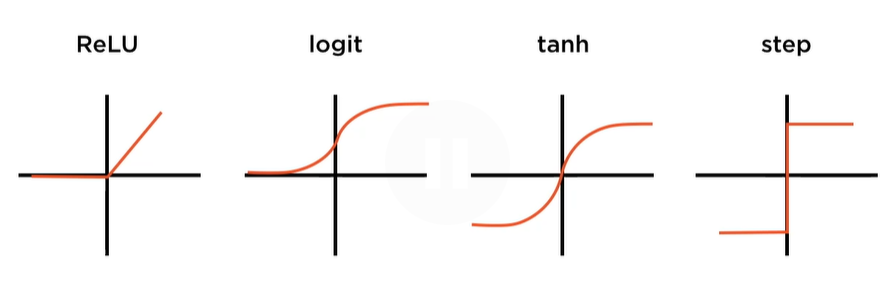
All of these function contain an active region with a slope. The choice of activation function is crucial in determining performance. 

##### Feature Map Size Calculations
Formula for dimension calculations: <br>
O = (W - K + 2P) / S + 1<br>
O = output dimension (height or width)
W = height or width of the input dimension (the matrix/image)<br>
K = height or width of the kernel size (often squared but not always)  <br>
P = padding (if any)<br>
S = stride size (horizontal if calculating the width or vertical if calculating the height)

#### Demo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

ModuleNotFoundError: No module named 'torch'

In [ ]:
mnist_train = pd.read_csv('datasets(mnist-in-csv/mnist_train.csv)')
mnist_test = pd.read_csv('datasets(mnist-in-csv/mnist_test.csv)')

In [ ]:
# Clean up the data
mnist_train = mnist_train.dropna()  # Drops all records which we have missing fields
mnist_test = mnist_test.dropna()

In [ ]:
# Explore the data
random_sel = mnist_train.sample(8)
random_sel.shape
# Output is (8, 785), 8 pictures and each record has 785 columns

In [ ]:
# Drop the 'label' column
image_features = random_sel.drop('label', axis=1)

# Convert to a 0-1 scale (pixel intensity values = 0 - 255)
image_batch = (torch.Tensor(image_features.values / 255.)).reshape((-1, 28, 28))

image_batch.shape
# Output is torch.Size([8, 28, 28]), 8 images, 28x28 pixels

In [ ]:
# Make a grid
# make_grid converts our images to 3-channel images.
grid = torchvision.utils.make_grid(image_batch.unsqueeze(1), nrow=8)
grid.shape
# Output is torch.Size([3, 32, 242])

In [ ]:
# Make the channel dimension the last of the three, 
# matplotlib expects us to have the channel information in the last dimension
plt.figure(figsiza=(12,12))
plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')

In [ ]:
# Extract the training features (image pixel intensity) ...
mnist_train_features = mnist_train.drop('label', axis=1)
# ... and the corresponding labels into separate tensors.
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_target = mnist_test['label']

In [ ]:
# Convert all of the image data to torch.Tensors
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)

In [ ]:
print(X_train_tensor.shape)
print(x_train_tensor.shape)
print(Y_test_tensor.shape)
print(y_test_tensor.shape)
# Output is
# torch.Size([60000, 784])
# torch.Size([60000])
# torch.Size([10000, 784])
# torch.Size([10000])

In [ ]:
# CNNs in PyTorch expect images to be fed in (batches, channels, height/width, height/width)
# We have to reshape the images.
X_train_tensor = X_train_tensor.reshape(-1, 1, 28, 28)

x_test_tensor = x_test_tensor.reshape(-1, 1, 28, 28)

In [ ]:
print(X_train_tensor.shape)
print(x_train_tensor.shape)
print(Y_test_tensor.shape)
print(y_test_tensor.shape)
# Output is
# torch.Size([60000, 1, 28, 28])
# torch.Size([60000])
# torch.Size([10000, 1, 28, 28])
# torch.Size([10000])

### Building Convolutional Neural Networks for Image Classification

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Input size is the number of channels in the input image, 1 for grayscales
in_size = 1

# Two convolutional layers. Refers to the number of feature maps generated by each
#  convolutional layer, the depth of the output produced by each layer.
hid1_size = 16
hid2_size = 32

# Output size (the dataset is about digits, and since we have 10 digits it will be equal to 10)
out_size = 10

# Convolutional kernel size, 5x5 
k_conv_size = 5

In [ ]:
# Set up our custom neural network which inherits from nn.Module base class.
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size), 
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        # The size of this linear layer depends on the size of the outputs of previous layers,
        # 512 based on our input image size and the strides and the kernel size. 
        # We can use the formula discussed earlier (O = (W - K + 2P) / S + 1?) or a more practical approach below.
        self.fc = nn.Linear(512, out_size)
    
    # Takes the input images and applies the convolutional, pooling and linear layers to the input
    def forward(self, x):
        
        # If your're not sure of how many pixels you should have in your linear layer,
        # you can simply leave the linear layer out (self.fc = nn.Linear(512, out_size)),
        # print out the shapes at every layer of your cnn, and once you know the shape of
        # the final output you can then set up your linear layer.
        
        out = self.layer1(x)
        print(out.shape)
        
        # The output of the first layer is passed into the second layer
        out = self.layer2(out)
        print(out.shape)
        
        # Reshape for the linear layers to a 1d vector 
        out = out.reshape(out.size(0), -1)
        print(out.shape)
        
        # The output will be fed into our fully connected layer which we had set to 512 pixels
        out = self.fc(out)
        print(out.shape)
        
        #return out
        return F.log_softmax(out, dim=-1)

In [ ]:
# Create an instance of this model
model = ConvNet()

In [ ]:
# Something with using GPU ...
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
# Output is cuda:0

In [ ]:
# Make a copy somehow ...
model.to(device)

In [ ]:
# Copy over the tensors for the training and testing images and the corresponding labels
# Unsure of whether this comment should be in this or next cell ...
ConvNet(
    (layer1): Sequential(
        (0): Conv2d(1, 16, kernel_size=(5,5), stride=(1,1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (layer2): Sequential(
        (0): Conv2d(16, 32, kernel_size=(5,5), stride=(1,1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )    
    (fc): Linear(in_features=512, out_features=10, bias=True)
    )

In [ ]:
# Copy over the tensors for the training and testing images and the corresponding labels
X_train_tensor = X_train_tensor.to(device)
x_test_tensor = X_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

#### Training a CNN

In [ ]:
# Learning rate
learning_rate = 0.001

# Loss function, can be used when we apply softmax  activationto our linear layer
# or work directly with the output of the linear layer.
criterion = nn.CrossEntropyLoss()

# Instantiate an Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Number of epochs that the cnn will train
num_epochs = 10
loss_values = list()

In [ ]:
# Code to train the CNN
for epoch in range(1, num_epochs):
    outputs = model(X_train_tensor)
    # Calculate the loss from the actual labels vs the predicted labels
    loss = criterion(outputs, Y_train_tensor)
    
    # Zero out the gradients for our model
    optimizer.zero_grad()
    # Make a backward pass for the neural network
    loss.backward()
    # Update the model parameters 
    optimizer.step()
    
    print('Epoch - %d, loss - #%.5f '%(epoch, loss.item()))
    loss_values.append(loss.item())
    
# Output is:
# Layer 1
# torch.Size([60000 (no images), 16 (depth of convolutional layer output), 
# 12, 12 (images 28x28, kernel =5 => images 24x24, MaxPool size=2 => images 12x12)])

# Layer 2
# torch.Size([60000, 32, 4, 4]), depth of 32 as of hid2_size

# Linear layer (?)
# torch.Size([60000, 512 (32*4*4)])

# The fully connected linear layer has an output of 10 (n.o. digits)
# torch.Size([60000, 10]) 

In [ ]:
# Plot the list of the loss values for each epoch
x = (range(0, 9))

plt.figure(figsize=(8,8))
plt.plot(x, loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# We are now ready to see how this model performs on the test data
# eval mode is important when using batch normalization after our convolutional layers.
model.eval()


In [ ]:
ConvNet(
    (layer1): Sequential(
        (0): Conv2d(1, 16, kernel_size=(5,5), stride=(1,1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (layer2): Sequential(
        (0): Conv2d(16, 32, kernel_size=(5,5), stride=(1,1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )    
    (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
# Evaluate model by calculating the accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Code to feed in the test data to our model for evaluation
with torch.no_grad():
    
    correct = 0
    total = 0
    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    
    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()
    
    print('Accuracy: ', accuracy_score(predicted, y_test))
    print('Precision: ', precision_score(predicted, y_test, average='weighted'))
    print('Recall: ', recall_score(predicted, y_test, average='weighted'))
    
    # Output is
    # Accuracy: 0.7834
    # Precision: 0.8176...
    # Recall: 0.7834
    # With an increased amount of epochs the model will perform better, and we 
    # can also perform hyperparameter tuning, see below.

##### Hyperparameter Tuning

In [ ]:
# Change this layer and hid1_size = 16
hid1_size = 8

# Continue with ...
model = ConvNet()

# ... and all of the remaining cells

# Output is 
# Accuracy: 0.7098
# Precision: 0.74958...
# Recall: 0.7098
# Since the result got worse, change back hid1_size = 16

# Instead, change the learning_rate from 0.001 to
learning_rate = 0.01

# Run all cells
# Output is
# Accuracy: 0.8676
# Precision: 0.8784...
# Recall: 0.8676

# Switch back the learning rate ...
learning_rate = 0.001

# ... and switch loss method to NLLLoss ...
criterion = nn.NLLLoss()

# ... and instead of the output linear layer (return out) we apply a log_soxtmax function
# to our def forward()
# Always use a log_softmax output when using NLLLoss!!!
# Run all cells

# Output is
# Accuracy: 0.761
# Precision: 0.80432...
# Recall: 0.761

# Change back criterion to CrossEntropyLoss() and change the optimizer to Stochastic gradient descent optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# Let def forward() return out again and run all cells

# Output is
# Accuracy: 0.1261
# Precision: 0.30527...
# Recall: 0.1261

# Change back to the Adam optimizer and let
learning_rate = 0.01
# Run all cells

# Output is
# Accuracy: 0.8876
# Precision: 0.89328...
# Recall: 0.8876

### Optimizing Image Classification with Hyperparameter Tuning

#### Perform image classification on the CIFAR-10 dataset using CNNs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [ ]:
# Pre-process the images by normalizing using the mean and standard deviation
import pickle

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets
!tar xf datasets/cifar-10-python.tar.gz -C datasets

In [ ]:
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
    X = pickle.load(input_file, encoding='latin1')

In [ ]:
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
    X = pickle.load(input_file, encoding='latin1')

In [ ]:
X.keys
# Output is dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [ ]:
# Here there was a huge jump in the code to 
# Print the result
print(pop_mean)
print(pop_std)

# Output is
# [0.491.., 0.482.., 0.4467..]
# [0.238.., 0.234.., 0.2526..]

# Copy the output results and put the values in variables
mean = [0.491.., 0.482.., 0.4467..]
std = [0.238.., 0.234.., 0.2526..]

In [ ]:
# Set up the transformations that we want to use
train_transform = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [ ]:
# User the same set of transformation to pre-process test data but leave out the flip
test_transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [ ]:
# CIFAR-10 dataset ias a built-in dataset in PyTorch
trainset = torchvision.datasets.CIFAR10(root='datasets/cifar10/train',
                                       train=True,
                                       download=True,
                                       transform=train_transform)

In [ ]:
# And if we need to download the test dataset
# CIFAR-10 dataset ias a built-in dataset in PyTorch
testset = torchvision.datasets.CIFAR10(root='datasets/cifar10/train',
                                       train=False,
                                       download=True,
                                       transform=test_transform)

In [ ]:
# Instantiate DataLoaders to load this data in batches
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=16,
                                         shuffle=True,
                                         num_workers=2)

In [ ]:
# Specify the test DataLoader
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=16,
                                         shuffle=False,
                                         num_workers=2)


In [ ]:
# The classes into which the images can be categorized
class_names = trainset.classes

print(class_names)
# Output is
# ['airplane', 'automobile', 'bird', 'cat', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Look at the shape of one batch
img, label = iter(trainloader).next()

In [ ]:
img.shape
# Output is
# torch.Size((16, 3, 32, 32))

In [ ]:
label
# Output is
# tensor([3, 4, 4, 7, 3, 8, 0, 3, 5, 8, 2, 6, 2, 5, 7, 0])
# The labels are numeric values corresponding to the class names or categories.
# Label 0 corresponds to airplane, 3 to cat a.s.o.

#### Setting up the CNN to perform classification on the dataset

In [ ]:
in_size = 3 # Channels

# Convolutional layers
hid1_size = 16
hid2_size = 32

# Linear layers
out1_size = 400
out2_size = 10  # Corresponding to the number of categories

k_conv_size = 5

In [ ]:
# Design our CNN
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size), 
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        # Fully connected layers
        self.layer3= nn.Sequential(
            nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
            nn.ReLU(),
            # Dropout layers are used in the training mode where we randomly turn off
            # certain neurons, forcing others ti learn significant deatures from our input data
            # to mitigate the network to overfitting on the training data.
            nn.Dropout(0.5),
            nn.Linear(out1_size, out2_size)

    # Takes the input images and applies the convolutional, pooling and linear layers to the input
    def forward(self, x):
        
        # If your're not sure of how many pixels you should have in your linear layer,
        # you can simply leave the linear layer out (self.fc = nn.Linear(512, out_size)),
        # print out the shapes at every layer of your cnn, and once you know the shape of
        # the final output you can then set up your linear layer.
        
        out = self.layer1(x)
        print(out.shape)
        
        # The output of the first layer is passed into the second layer
        out = self.layer2(out)
        print(out.shape)
        
        # Reshape for the linear layers to a 1d vector 
        out = out.reshape(out.size(0), -1)
        print(out.shape)
        
        # The output will be fed into our fully connected layer which we had set to 512 pixels
        out = self.layer3(out)
        print(out.shape)
        
        #return out
        return F.log_softmax(out, dim=-1)

In [ ]:
# Instantiate and train the model parameters
model = ConvNet()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# Output is 'cuda:0'

In [ ]:
# Copy the model parameters over to the GPU
model.to(device)

In [ ]:
ConvNet(
    (layer1): Sequential(
        (0): Conv2d(1, 16, kernel_size=(5,5), stride=(1,1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (layer2): Sequential(
        (0): Conv2d(16, 32, kernel_size=(5,5), stride=(1,1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )    
    (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
# Set up the parameters to train our model
learning_rate = 0.001

criterion = nn.NLLLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_step = len(trainloader)
num_epochs = 10
loss_values = list()

In [ ]:
# Outer for loop is for the number of epochs of training we want to run.
for epoch in range(num_epochs):
    
    # Inner for loop runs over all of the batches in the training data.
    for i, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        # Calculate the loss from the actual labels vs the predicted labels.
        loss = criterion(outputs, labels)
    
        # Zero out the gradients for our model.
        optimizer.zero_grad()
        # Make a backward pass for the neural network.
        loss.backward()
        # Update the model parameters .
        optimizer.step()
        
        # For every 200 batches, we'll print out the current epoch, the current step
        # and the loss from our model.
        if (i+1) % 2000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            loss_values.append(loss.item())

print('Finished Training')
# Run cell and start training!!! This dataset takes around 10-15 minutes on the GPU.

In [ ]:
# Visualize the loss values for every epoch
x = (range(1, 11))

plt.figure(figsize= (12, 10))

plt.plot(x, loss_values)
plt.xlabel('Step')
plt.ylabel('Loss')

In [ ]:
# Let's use the fully trained model on the test dataset for prediction.
# Make sure that you switch the model over to the eval mode since we have batch
# normalization and dropout layers in our model.
model.eval()

# Turn off gradients during the evaluation process
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the model on the 10000 test images: {}%'\
          .format(100 * correct / total))
    
# Output is 
# Accuracy of the model on the 10000 test images: 73.27%

In [ ]:
# Let's make a prediction using our model on a sample image
sample_img, _ = testset[23]

In [ ]:
sample_img.shape
# Output is
# torch.Size([3, 32, 32])

In [ ]:
# Transpose the axes for matplotlib
sample_img = np.transpose(sample_img, (1, 2, 0))

In [ ]:
# Scale the sample image to be between 0 and 1, centered at 0.5
m, M = sample_img.min(), sample_img.max()

sample_img = (1/(abs(m) * M)) * sample_img + 0.5

In [ ]:
# Display image
plt.figure(figsize = (6, 6))
plt.imshow(sample_img)

In [ ]:
# Access test image and corresponding label from the dataset
test_img, test_label = testset[23]

# Reshape it to a form that our model expet (batch, num_channels, height, width)
test_img = test_img.reshape(-1, 3, 32, 32)

In [ ]:
# Copy this image tensor over to a Cuda device before passing it into our model
out_predict = model(test_img.to(device))
_, predicted = torch.max(out_predict.data, 1)

In [ ]:
print('Actual Label: ', test_label)
# Output is
# Actual Label: 9

In [ ]:
print('Predicted Label: ', predicted.item())
# Output is
# Predicted Label: 9

In [ ]:
print('Class name for {}: {}'.format(predicted.item(), class_names[predicted.item()]))
# Output is
# Class name for 9: truck

##### Changing activation functions

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            # nn.ReLU(),  # Activation layer
            # nn.Sigmoid(),
            # nn.Tanh(),
            nn.ELU();  # Exponential Linear Unit
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size), 
            nn.BatchNorm2d(hid2_size),
            # nn.ReLU(),
            # nn.Sigmoid(),
            # nn.Tanh(),
            nn.ELU();
            nn.MaxPool2d(kernel_size=2))
        
        # Fully connected layers
        self.layer3= nn.Sequential(
            nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
            # nn.ReLU(),
            # nn.Sigmoid(),
            # nn.Tanh(),
            nn.ELU();
            nn.Dropout(0.5),
            nn.Linear(out1_size, out2_size)

    # Takes the input images and applies the convolutional, pooling and linear layers to the input
    def forward(self, x):
        
        out = self.layer1(x)
        print(out.shape)
        
        # The output of the first layer is passed into the second layer
        out = self.layer2(out)
        print(out.shape)
        
        # Reshape for the linear layers to a 1d vector 
        out = out.reshape(out.size(0), -1)
        print(out.shape)
        
        # The output will be fed into our fully connected layer which we had set to 512 pixels
        out = self.layer3(out)
        print(out.shape)
        
        #return out
        return F.log_softmax(out, dim=-1)

In [ ]:
# Select this cell where you're evaluating your model and select Run All Above Selected Cell.
# Wait for the computer to run the cells and then run this cell.
model.eval()

# Turn off gradients during the evaluation process
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the model on the 10000 test images: {}%'\
          .format(100 * correct / total))
 

# Output with ReLU() is 
# Accuracy of the model on the 10000 test images: 73.27%

# Output with Sigmoid() is 
# Accuracy of the model on the 10000 test images: 68.02%

# Change Sigmoid() to Tanh(), run all cells above this, then this.
# Output with Tanh() is 
# Accuracy of the model on the 10000 test images: 68.81%

# Change Tanh() to ELU(), run all cells above this, then this.
# Output with ELU() is 
# Accuracy of the model on the 10000 test images: 71.62%

##### Apply different pooling functions

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ELU();  # Exponential Linear Unit
            # nn.MaxPool2d(kernel_size=2))
            # nn.AvgPool2d(kernel_size=2))
            nn.LPPool2d(1, kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size), 
            nn.BatchNorm2d(hid2_size),
            nn.ELU();
            # nn.MaxPool2d(kernel_size=2))
            # nn.AvgPool2d(kernel_size=2))
            nn.LPPool2d(1, kernel_size=2))
        
        # Fully connected layers
        self.layer3= nn.Sequential(
            nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
            nn.ELU();
            nn.Dropout(0.5),
            nn.Linear(out1_size, out2_size)

    # Takes the input images and applies the convolutional, pooling and linear layers to the input
    def forward(self, x):
        
        out = self.layer1(x)
        print(out.shape)
        
        # The output of the first layer is passed into the second layer
        out = self.layer2(out)
        print(out.shape)
        
        # Reshape for the linear layers to a 1d vector 
        out = out.reshape(out.size(0), -1)
        print(out.shape)
        
        # The output will be fed into our fully connected layer which we had set to 512 pixels
        out = self.layer3(out)
        print(out.shape)
        
        #return out
        return F.log_softmax(out, dim=-1)

In [ ]:
# Run all cell until this and then this to train the neural network.

# Outer for loop is for the number of epochs of training we want to run.
for epoch in range(num_epochs):
    
    # Inner for loop runs over all of the batches in the training data.
    for i, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        # Calculate the loss from the actual labels vs the predicted labels.
        loss = criterion(outputs, labels)
    
        # Zero out the gradients for our model.
        optimizer.zero_grad()
        # Make a backward pass for the neural network.
        loss.backward()
        # Update the model parameters .
        optimizer.step()
        
        # For every 200 batches, we'll print out the current epoch, the current step
        # and the loss from our model.
        if (i+1) % 2000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            loss_values.append(loss.item())

print('Finished Training')
# Run cell and start training!!! This dataset takes around 10-15 minutes on the GPU

# Then run model.eval() cell to get the accuracy of this new model which is 73.29%.

Before we change pooling layer function we choose Edit => Clear All Outputs and
scroll back to class ConvNet(nn.Module):

PyTorch allows us to tweak our layer to be somewhere between MaxPool and AvgPool.
This is called the LPPool. 2D power average pooling: p = infinity gives Max pooling
and p = 1 gives Average Pooling. Other values between 1 and infinity allows us to tweak
somewhere between MaxPool and AvgPool.

Scroll down and select the cell above model.eval() (x = (range(1, 11)) and choose Run All Above Selected Cell. When the model has trained, run model.eval() to get the accuracy. Now choose different values for LPPool and see how the model changes.

##### Apply different convolution kernel sizes

Just for showing the problem ...

Start with Edit => Clear All Outputs, refresh the page and restart the kernel.

Run all cells until you come to the cell where your're defining the variables for your CNN (in_size = 3 ...). Let set the kernel size to 6.

The kernel size has to be such that your output feature map as integer values for dimensions, height. They have to fit in with the size of the input image that you're working on, and the size of the kernel of the pooling layer that you're using. 

Run all cells until you come to for epoch in rang(num_epochs): Here you will get an error when running the cell due to a mismatch in kernel size

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [ ]:
mean = [0.491.., 0.482.., 0.4467..]
std = [0.238.., 0.234.., 0.2526..]

In [ ]:
# We will work with the same dataset but we'll resixe the input images so that
# they are 128x128 images, larger images.

train_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalization(mean, std)  # Should it be Normalize???
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalization(mean, std)
])

In [ ]:
trainset = torchvision.dataset.CIFAR10(root=....)

testset = torchvision...

trainloader = torch.utils...

tesloader = torch.utils...

In [ ]:
# Set up variables that hold information about the CNN that we are about to set up.
in_size = 3  # RGB = 3 channels

# Convolution and pooling layers
hid1_size = 16
hid2_size = 32
hid3_size = 64

# Fully connected layers (linear?)
out1_size = 2000
out2_size = 10

k_conv_soze = 9

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Conv2D output will be 120x120, and the MaxPool2d output will be 60x60
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(); 
            nn.MaxPool2d(kernel_size=2))
        
        # Conv2D output will be 52x52 and MaxPool2D will be 26x26
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size), 
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(); 
            nn.MaxPool2d(kernel_size=2))
        
        # Conv2D output will be 18x18 and MaxPool2D will be 9x9, equal to the size 
        # of our convolution kernel
        self.layer3= nn.Sequential(
            nn.Conv2d(hid2_size, hid3_size, k_conv_size), 
            nn.BatchNorm2d(hid3_size),
            nn.ReLU(); 
            nn.MaxPool2d(kernel_size=2))
        
        # Fully connected layers
        # The number of neurons in the 1st fully connected layer is the number of
        # the feature maps produced by the last convolutional layer (hid3_size*the size
        # of every feature map, that is 9x9)
        self.layer4= nn.Sequential(
            nn.Linear(hid3_size * k_conv_size * k_conv_size, out1_size),
            nn.ReLU();
            nn.Dropout(0.5),
            nn.Linear(out1_size, out2_size)
            
    def forward(self, x):
        
        out = self.layer1(x)
        print(out.shape)
        
        out = self.layer2(out)
        print(out.shape)
        
        out = out.reshape(out.size(0), -1)
        print(out.shape)
        
        out = self.layer3(out)
        print(out.shape)
        
        #return out
        return F.log_softmax(out, dim=-1)

In [ ]:
model = ConvNet()
device = torch.device...
model.to(device)
learning_rate =
criterion =
optimizer =

In [ ]:
# Here is the cell where we train our CNN
total_step =...

for epoch in range...

# Run these cells and observe the output sizes after each layer. Check that the
# output matches what we are expecting.

In [ ]:
x = (range...)

plt.figure... ('Step' and 'Loss')

In [ ]:
model.eval()...

# Accuracy of this models is 75.76%.

### Performing Image Classification with Pre-trained Models

##### Transfer Learning
The practice of re-using a trained neural network that solves a problem similar to yours, freezing the lower layers and only re-training the higher layers.

Reusing a neural network can involve reusing the architecture of the model as well as the pre-trained weights. Transfer learning works only for specific use cases that are common, such as image recognition and classification or language translation. 

The initial layers of any neural network focus on granilar details of the input. Lower layers mostly perform feature extraction. With transfer learning we can freeze the lower layers so that they continue to perform feature extraction. The higher/later layers are more specific to your problem. Numbers of outputs likely changes too.

Benefits of Transer Learning:
- Ride on the shoulders of giants
- NN architecture
- Choice of initialization
- Activation functions
- Number and density of layers

Transfer learning works very well if you have a small dataset on which you want to train your model. You can do more with less. If we have little training data we might overfit on the data. It is faster and cheaper: We have smaller training data the we need to feed into our model and we only need to train a few layer.

In PyTorch, there are supprort for several famous NN architectures, specially for image classification (torchvision.models is Alexnet, VGG, ResNet, Inception ...). 

##### Using the ResNet-18 Pre-trained Model

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, transforms

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

Pre-trained models in PyTorch expect images of at least 224x224, pixel values in the range (0,1) and normalized using these values: https://pytorch.org/docs/stable/torchvision/models.html

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomResizeCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [ ]:
data_dir = 'datasets/cifar10/train'
batch_size = 8
num_workers = 2

In [ ]:
trainset = datasets.CIFAR10(root=data_dir,
                           train=True,
                           download=True,
                           transform=train_transform)

In [ ]:
testset = datasets.CIFAR10(root=data_dir,
                           train=False,
                           download=True,
                           transform=test_transform)

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         num_workers=num_workers)

In [ ]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=num_workers)

In [ ]:
dataloaders = {
    'train': trainloader,
    'test': testloader
}

In [ ]:
# This holds the number of batches that exist in training and test data.
dataset_sizes = {'train': len(trainloader), 'test': len(testloader)}

In [ ]:
class_names = trainset.classes

print(class_names)
# Output is the image categories.

In [ ]:
from torchvision import models

In [ ]:
# If we want to use the pre-trained weight of the ResNet model, which we do,
# we set pretrained equal to True. If we only want to use the architecture of
# the model but not the pretrained weights, we set pretrained equal False.
model = models.resnet18(pretrained=True)

# In order to use this model with our dataset, we'll need to change the last
# layer of this model. All pretrained models in PyTorch have been trained on
# the ImageNet dataset which has images classified into 1000 categories. The 
# out_feature of the last linear layer is therefore equal to 1000. We need to 
# change this number to the number of categories in our dataset.

# There is a key associated with each layer in our model, this layer can be
# accessed using fc (fully connected).

# The first thing to do is to freeze the model parameters of all the layers in 
# the pretrained model.
for param in model.parameters():
    param.required_grad = False
    
# Then replace the last linear layer. The in_features is the number of features
# thar we need to pass into the input of this layer.
num_ftrs = model.fc.in_features
num_ftrs
# Outpus is 512
# Instantiate/replace a new linear layer as the last fully connected layer of the 
# ResNet model with the output size = number of output labels in our dataset.
model.fc = nn.Linear(num_ftrs, 10)

In [ ]:
# Use the CPU if only the CPU is available on your machine, otherwise the GPU
device = torch.device('cpu')

if torch.cuda.is_available():
    device = torch.device('cuda')
    
print(device)

In [ ]:
# Copy over our model parameters to the device
model.to(device)

#### The Train Function to Find the Best Model Weights

In [ ]:
# The model is set ut, let's instantiate and tran the model parameters
model = ConvNet()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

model.to(device)

In [ ]:
# Set up the parameters to train the model
learning_rate = 0.001

criterion = nn.NLLLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_step = len(trainloader)
num_epochs = 10
loss_values = list()

In [ ]:
for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(trainloader):
        
        # For every batch we'll need to move the image tensors and corresponding ylabels
        # over to the device before we can feed them into our ML model and calculate the loss.
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # The backward pass that calculates the gradients for the model weights
        # and then updates the gradients using the optimizer.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                 .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            loss_values.append(loss.item())

print('Finished Training')

In [ ]:
x = (range(1, 11))

plt.figure(figsize=(12, 10))

plt.plot(x, loss_values)
plt.xlabel('Step')
plt.ylbel('Loss')

In [ ]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the model on the 10000 test images: {}%'\
          .format(100 * correct / total))

#### Predictions Using Pre-trained Models

In [ ]:
model = train_model(model, criterion, optimizer_ft,
                   exp_lr_scheduler, num_epochs=1)

In [ ]:
# Help function to function below
def imshow(inp, title):
    
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.imshow(inp)
    plt.title(title)
    plt.pause(5)

In [ ]:
# Set up torch.no_grad so that we don't calculate gradients in the prediction pass
with torch.no_grad():
    
    inputs, labels = iter(dataloaders['test']).next()
    inputs, labels = inputs.to(device), labels.to(device)
    inp = torchvision.utils.make_grid(inputs)
    
    outputs = model(inputs)
    _, preds = torh.max(outputs, 1)
    
    for j in range(len(inputs)):
        inp = inputs.data[j]
        imshow(inp, 'predicted: ' + class_names[preds[j]])